# Week 6 Practice

## Financial Time Series

### Data Import via yfinance

Install the yfinance package, which is the downloader connected with the Yahoo Fiannce API.

In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl

Download the data and save it as a pandas DataFrame.

In [3]:
initial_data = yf.download("AAPL AMZN FB GOOG MSFT TSLA SPY ^VIX", start="2020-11-01", end="2021-11-01")

[*********************100%***********************]  8 of 8 completed


In [4]:
initial_data.head()

Adj Close                                                    \
                  AAPL         AMZN          FB         GOOG        MSFT   
Date                                                                       
2020-11-02  108.074875  3004.479980  261.359985  1626.030029  200.490311   
2020-11-03  109.734215  3048.409912  265.299988  1650.209961  204.553009   
2020-11-04  114.215385  3241.159912  287.380005  1749.130005  214.422455   
2020-11-05  118.269310  3322.000000  294.679993  1763.369995  221.259720   
2020-11-06  118.134956  3311.370117  293.410004  1761.750000  221.685806   

                                                    Close               ...  \
                   SPY        TSLA       ^VIX        AAPL         AMZN  ...   
Date                                                                    ...   
2020-11-02  325.613251  400.510010  37.130001  108.769997  3004.479980  ...   
2020-11-03  331.362213  423.899994  35.549999  110.440002  3048.409912  ...   
2020-11-04  338.767914  420.980011  29.570000  114.949997  3241.159912  ...   
2020-11-05  345.374847  438.089996  27.580000  119.029999  3322.000000  ...   
2020-11-06  345.295959  429.950012  24.860001  118.690002  3311.370117  ...   

                  Open                Volume                              \
                  TSLA       ^VIX       AAPL     AMZN        FB     GOOG   
Date                                                                       
2020-11-02  394.000000  38.570000  122866900  7257400  27165700  2535400   
2020-11-03  409.730011  36.439999  107624400  4897900  17961900  1661700   
2020-11-04  430.619995  36.790001  138235500  6839000  35364400  3570900   
2020-11-05  428.299988  27.559999  126387100  5789300  23823600  2065800   
2020-11-06  436.100006  27.870001  114457900  4647300  13891000  1660900   

                                                
                MSFT        SPY      TSLA ^VIX  
Date                                            
2020-11-02  30842200   86068300  29021100    0  
2020-11-03  27512000   93294200  34351700    0  
2020-11-04  42311800  126959700  32143100    0  
2020-11-05  36080100   82039700  28414500    0  
2020-11-06  25231900   74973000  21706000    0  

[5 rows x 48 columns]

In [5]:
initial_data['Adj Close'].head()

,AAPL,AMZN,FB,GOOG,MSFT,SPY,TSLA,^VIX
Date,,,,,,,,
2020-11-02,108.074875,3004.479980,261.359985,1626.030029,200.490311,325.613251,400.510010,37.130001
2020-11-03,109.734215,3048.409912,265.299988,1650.209961,204.553009,331.362213,423.899994,35.549999
2020-11-04,114.215385,3241.159912,287.380005,1749.130005,214.422455,338.767914,420.980011,29.570000
2020-11-05,118.269310,3322.000000,294.679993,1763.369995,221.259720,345.374847,438.089996,27.580000
2020-11-06,118.134956,3311.370117,293.410004,1761.750000,221.685806,345.295959,429.950012,24.860001


Set the Adj Closed data as a new DataFrame we will use.

In [6]:
data =  initial_data['Adj Close']
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2020-11-02 to 2021-10-29
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    251 non-null    float64
 1   AMZN    251 non-null    float64
 2   FB      251 non-null    float64
 3   GOOG    251 non-null    float64
 4   MSFT    251 non-null    float64
 5   SPY     251 non-null    float64
 6   TSLA    251 non-null    float64
 7   ^VIX    251 non-null    float64
dtypes: float64(8)
memory usage: 17.6 KB


In [7]:
data.head()

,AAPL,AMZN,FB,GOOG,MSFT,SPY,TSLA,^VIX
Date,,,,,,,,
2020-11-02,108.074875,3004.479980,261.359985,1626.030029,200.490311,325.613251,400.510010,37.130001
2020-11-03,109.734215,3048.409912,265.299988,1650.209961,204.553009,331.362213,423.899994,35.549999
2020-11-04,114.215385,3241.159912,287.380005,1749.130005,214.422455,338.767914,420.980011,29.570000
2020-11-05,118.269310,3322.000000,294.679993,1763.369995,221.259720,345.374847,438.089996,27.580000
2020-11-06,118.134956,3311.370117,293.410004,1761.750000,221.685806,345.295959,429.950012,24.860001


In [8]:
data.tail()

,AAPL,AMZN,FB,GOOG,MSFT,SPY,TSLA,^VIX
Date,,,,,,,,
2021-10-25,148.639999,3320.370117,328.690002,2775.459961,308.130005,455.549988,1024.859985,15.240000
2021-10-26,149.320007,3376.070068,315.809998,2793.439941,310.109985,455.959991,1018.429993,15.980000
2021-10-27,148.850006,3392.489990,312.220001,2928.550049,323.170013,453.940002,1037.859985,16.980000
2021-10-28,152.570007,3446.570068,316.920013,2922.580078,324.350006,458.320007,1077.040039,16.530001
2021-10-29,149.800003,3372.429932,323.570007,2965.409912,331.619995,459.250000,1114.000000,16.260000


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

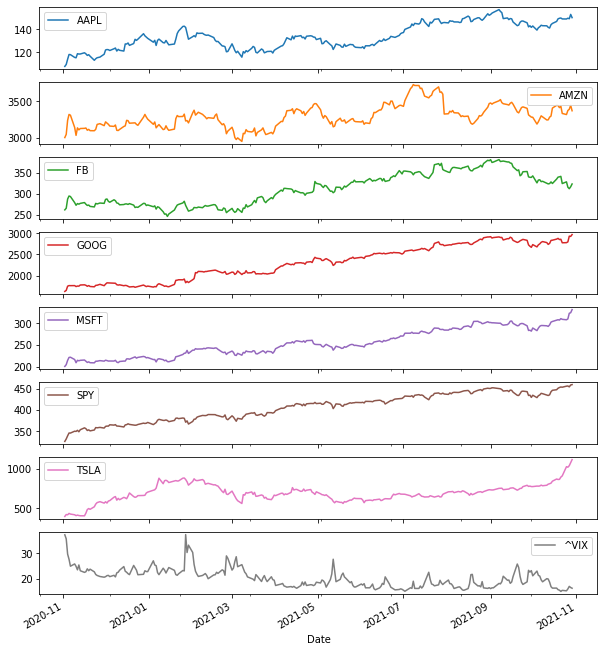

In [9]:
data.plot(figsize=(10, 12), subplots=True)

### Summary Statistics

In [10]:
data.describe().round(2)

,AAPL,AMZN,FB,GOOG,MSFT,SPY,TSLA,^VIX
count,251.00,251.00,251.00,251.00,251.00,251.00,251.00,251.00
mean,133.59,3293.99,311.55,2313.24,255.10,406.17,693.13,20.27
std,11.02,158.71,37.80,400.39,31.85,32.18,114.70,3.80
min,108.07,2951.95,245.64,1626.03,200.49,325.61,400.51,15.01
25%,125.02,3183.89,274.75,1975.84,230.10,378.39,629.65,17.25
50%,132.10,3285.85,312.46,2316.16,250.30,413.19,684.90,19.66
75%,144.56,3385.18,342.45,2723.61,285.78,434.57,753.76,22.49
max,156.69,3731.41,382.18,2965.41,331.62,459.25,1114.00,37.21


### Changes over Time

There are multiple options to calculate the changes in a time series over time, including absolute differences, percentage changes, and logarithmic (log) returns.

First, the absolute differences, for which pandas provides a special method:

In [11]:
data.diff().head()

,AAPL,AMZN,FB,GOOG,MSFT,SPY,TSLA,^VIX
Date,,,,,,,,
2020-11-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-11-03,1.659340,43.929932,3.940002,24.179932,4.062698,5.748962,23.389984,-1.580002
2020-11-04,4.481171,192.750000,22.080017,98.920044,9.869446,7.405701,-2.919983,-5.980000
2020-11-05,4.053925,80.840088,7.299988,14.239990,6.837265,6.606934,17.109985,-1.990000
2020-11-06,-0.134354,-10.629883,-1.269989,-1.619995,0.426086,-0.078888,-8.139984,-2.719999


In [12]:
data.diff().describe().round(2)

,AAPL,AMZN,FB,GOOG,MSFT,SPY,TSLA,^VIX
count,250.00,250.00,250.00,250.00,250.00,250.00,250.00,250.00
mean,0.17,1.47,0.25,5.36,0.52,0.53,2.85,-0.08
std,2.09,51.34,5.77,33.24,3.33,3.16,23.42,1.94
min,-5.11,-272.33,-17.27,-106.34,-10.65,-9.35,-68.83,-7.00
25%,-1.04,-25.40,-3.33,-12.13,-1.34,-1.22,-9.23,-0.96
50%,0.17,4.28,0.06,5.66,0.27,0.60,1.82,-0.26
75%,1.54,32.13,4.03,20.43,2.77,2.51,14.61,0.74
max,6.51,192.75,22.41,142.56,13.06,9.13,115.18,14.19


From a statistics point of view, absolute changes are not optimal because they are dependent on the scale of the time series data itself. Therefore, percentage changes are usually preferred. The following code derives the percentage changes or percentage returns (also: simple returns) in a financial context and visualizes their mean values per column:

In [13]:
data.pct_change().round(4).head()

,AAPL,AMZN,FB,GOOG,MSFT,SPY,TSLA,^VIX
Date,,,,,,,,
2020-11-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-11-03,0.0154,0.0146,0.0151,0.0149,0.0203,0.0177,0.0584,-0.0426
2020-11-04,0.0408,0.0632,0.0832,0.0599,0.0482,0.0223,-0.0069,-0.1682
2020-11-05,0.0355,0.0249,0.0254,0.0081,0.0319,0.0195,0.0406,-0.0673
2020-11-06,-0.0011,-0.0032,-0.0043,-0.0009,0.0019,-0.0002,-0.0186,-0.0986


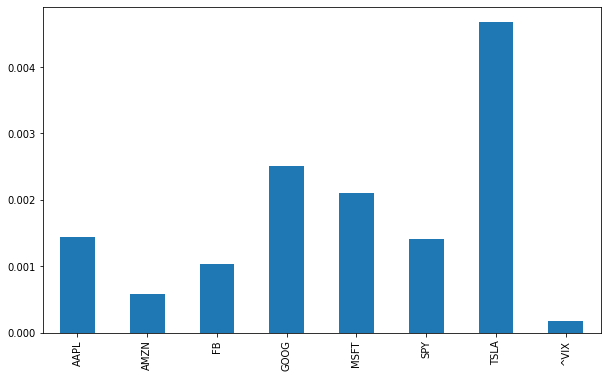

In [14]:
data.pct_change().mean().plot(kind='bar', figsize=(10, 6));

As an alternative to percentage returns, log returns can be used. In some scenarios, they are easier to handle and therefore often preferred in a financial context.

In [15]:
rets = np.log(data / data.shift(1))
rets.head().round(4)

,AAPL,AMZN,FB,GOOG,MSFT,SPY,TSLA,^VIX
Date,,,,,,,,
2020-11-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-11-03,0.0152,0.0145,0.0150,0.0148,0.0201,0.0175,0.0568,-0.0435
2020-11-04,0.0400,0.0613,0.0799,0.0582,0.0471,0.0221,-0.0069,-0.1842
2020-11-05,0.0349,0.0246,0.0251,0.0081,0.0314,0.0193,0.0398,-0.0697
2020-11-06,-0.0011,-0.0032,-0.0043,-0.0009,0.0019,-0.0002,-0.0188,-0.1038


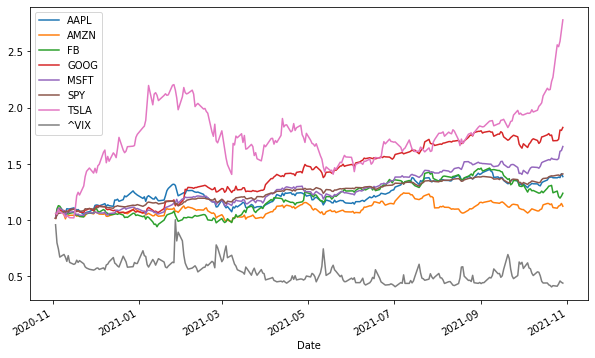

In [16]:
rets.cumsum().apply(np.exp).plot(figsize=(10, 6));

### Resampling

Resampling is an important operation on financial time series data. Usually this takes the form of downsampling, meaning that, for example, a tick data series is resampled to one-minute intervals or a time series with daily observations is resampled to one with weekly or monthly observations

In [17]:
data.resample('1w', label='right').last().head()

,AAPL,AMZN,FB,GOOG,MSFT,SPY,TSLA,^VIX
Date,,,,,,,,
2020-11-08,118.134956,3311.370117,293.410004,1761.750000,221.685806,345.295959,429.950012,24.860001
2020-11-15,118.702286,3128.810059,276.950012,1777.020020,214.541367,353.125671,408.500000,23.100000
2020-11-22,116.791252,3099.399902,269.700012,1742.189941,209.022812,350.394165,489.609985,23.700001
2020-11-29,116.044762,3195.340088,277.809998,1793.189941,213.831360,358.618347,585.760010,20.840000
2020-12-06,121.678299,3162.580078,279.700012,1827.989990,212.967026,364.712463,599.039978,20.790001


In [18]:
data.resample('1m', label='right').last().head()

,AAPL,AMZN,FB,GOOG,MSFT,SPY,TSLA,^VIX
Date,,,,,,,,
2020-11-30,118.493271,3168.040039,276.970001,1760.739990,212.678909,357.030670,567.599976,20.570000
2020-12-31,132.069473,3256.929932,273.160004,1751.880005,220.974640,370.258087,705.669983,22.750000
2021-01-31,131.342880,3206.199951,258.329987,1835.739990,230.452637,366.484985,793.530029,33.090000
2021-02-28,120.873283,3092.929932,257.619995,2036.859985,231.401657,376.675262,675.500000,27.950001
2021-03-31,121.760445,3094.080078,294.529999,2068.629883,234.777374,393.776062,667.929993,19.400000


<AxesSubplot:xlabel='Date'>

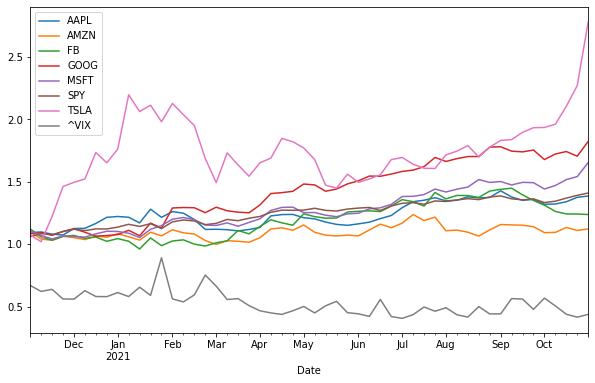

In [19]:
rets.cumsum().apply(np.exp). resample('1w', label='right').last().plot(figsize=(10, 6))

<AxesSubplot:xlabel='Date'>

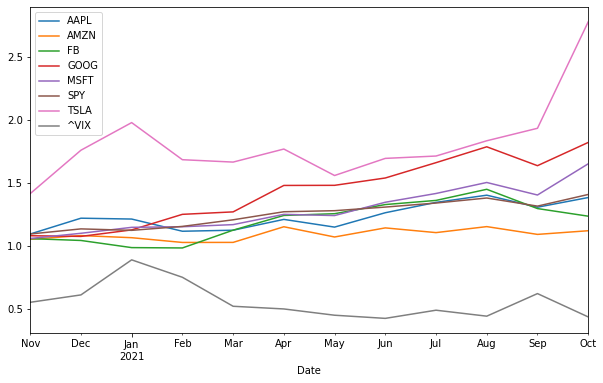

In [20]:
rets.cumsum().apply(np.exp). resample('1m', label='right').last().plot(figsize=(10, 6))

### Rolling Statistics

It is financial tradition to work with rolling statistics, often also called financial indicators or financial studies. Such rolling statistics are basic tools for financial chartists and technical traders, for example. This section works with a single
financial time series only:

In [21]:
sym = 'AAPL'
AAPL_data = pd.DataFrame(data[sym]).dropna()
AAPL_data.tail()

,AAPL
Date,
2021-10-25,148.639999
2021-10-26,149.320007
2021-10-27,148.850006
2021-10-28,152.570007
2021-10-29,149.800003


In [22]:
window = 10
AAPL_data['min'] = data[sym].rolling(window=window).min()
AAPL_data['mean'] = data[sym].rolling(window=window).mean()
AAPL_data['std'] = data[sym].rolling(window=window).std()
AAPL_data['median'] = data[sym].rolling(window=window).median()
AAPL_data['max'] = data[sym].rolling(window=window).max()
AAPL_data['ewma'] = data[sym].ewm(halflife=0.5, min_periods=window).mean()
AAPL_data.dropna().head()

,AAPL,min,mean,std,median,max,ewma
Date,,,,,,,
2020-11-13,118.702286,108.074875,115.591844,3.895899,116.955494,118.931206,118.655903
2020-11-16,119.737419,109.734215,116.758099,3.049258,118.202133,119.737419,119.467040
2020-11-17,118.831665,114.215385,117.667844,1.836970,118.460911,119.737419,118.990509
2020-11-18,117.478027,115.427666,117.994108,1.391330,118.460911,119.737419,117.856148
2020-11-19,118.085182,115.427666,117.975695,1.388499,118.393734,119.737419,118.027924


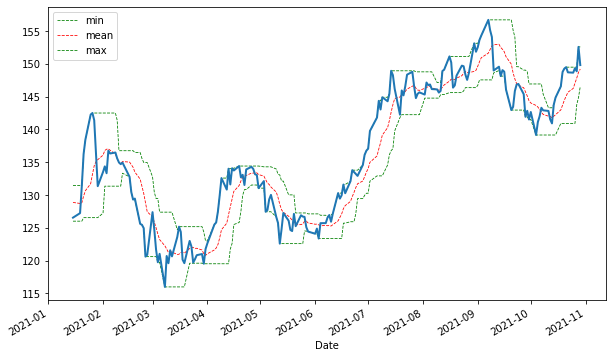

In [23]:
ax = AAPL_data[['min', 'mean', 'max']].iloc[-200:].plot(figsize=(10, 6), style=['g--', 'r--', 'g--'], lw=0.8)
data[sym].iloc[-200:].plot(ax=ax, lw=2.0);

Rolling statistics are a major tool in the so-called technical analysis of stocks, as compared to the fundamental analysis which focuses, for instance, on financial reports and the strategic positions of the company whose stock is being analysed.

A decades-old trading strategy based on technical analysis is using two simple moving averages (SMAs). The idea is that the trader should go long on a stock (or financial instrument in general) when the shorter-term SMA is above the longer-term SMA and should go short when the opposite holds true. The concepts can be made precise with pandas and the capabilities of the DataFrame
object.

Rolling statistics are generally only calculated when there is enough data given the window parameter specification.

In [24]:
AAPL_data['SMA1'] = data[sym].rolling(window=20).mean()
AAPL_data['SMA2'] = data[sym].rolling(window=60).mean()
AAPL_data[[sym, 'SMA1', 'SMA2']].tail()

,AAPL,SMA1,SMA2
Date,,,
2021-10-25,148.639999,144.126998,147.162699
2021-10-26,149.320007,144.497498,147.229661
2021-10-27,148.850006,144.798499,147.258169
2021-10-28,152.570007,145.351999,147.355500
2021-10-29,149.800003,145.709499,147.404833


<AxesSubplot:xlabel='Date'>

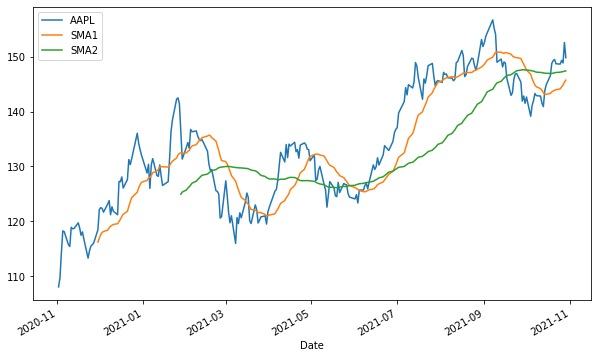

In [25]:
AAPL_data[[sym, 'SMA1', 'SMA2']].plot(figsize=(10, 6))

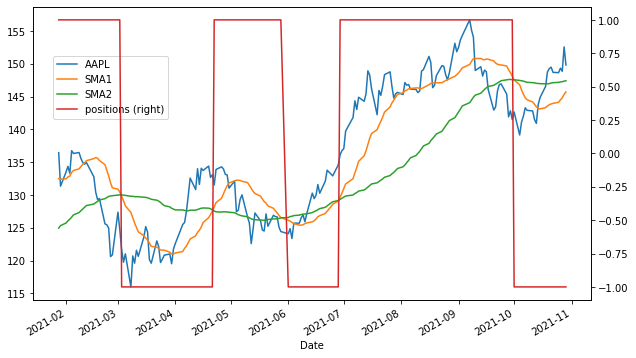

In [26]:
AAPL_data.dropna(inplace=True)
AAPL_data['positions'] = np.where(AAPL_data['SMA1'] > AAPL_data['SMA2'],1,-1)
ax = AAPL_data[[sym, 'SMA1', 'SMA2', 'positions']].plot(figsize=(10, 6),secondary_y='positions')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85))

### Correlation Analysis

As a further illustration of how to work with pandas and financial time series data, consider the case of the S&P 500 stock index and the VIX volatility index.

It is a stylized fact that when the S&P 500 rises, the VIX falls in general, and vice versa. This is about correlation and not causation. This section shows how to come up with some supporting statistical evidence for the stylized fact that the S&P 500 and the VIX are (highly) negatively correlated.

In [27]:
Corr_data = data[['SPY', '^VIX']].dropna()
Corr_data.tail()

,SPY,^VIX
Date,,
2021-10-25,455.549988,15.240000
2021-10-26,455.959991,15.980000
2021-10-27,453.940002,16.980000
2021-10-28,458.320007,16.530001
2021-10-29,459.250000,16.260000


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

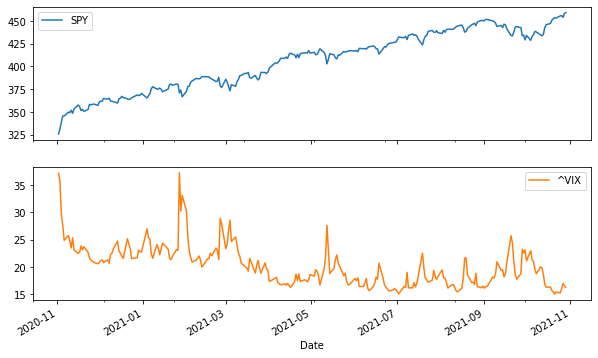

In [28]:
Corr_data.plot(subplots=True, figsize=(10, 6))

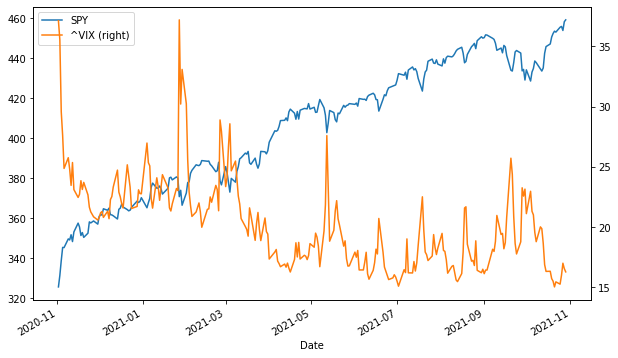

In [29]:
Corr_data.loc['2020-01-01':].plot(secondary_y='^VIX', figsize=(10, 6));

#### Logarithmic Returns

As pointed out earlier, statistical analysis in general relies on returns instead of absolute changes or even absolute values. Therefore, we’ll calculate log returns first before any further analysis takes place.

In [30]:
sprets = np.log(Corr_data / Corr_data.shift(1))
sprets.head()

,SPY,^VIX
Date,,
2020-11-02,NaN,NaN
2020-11-03,0.017502,-0.043485
2020-11-04,0.022103,-0.184180
2020-11-05,0.019315,-0.069669
2020-11-06,-0.000228,-0.103831


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

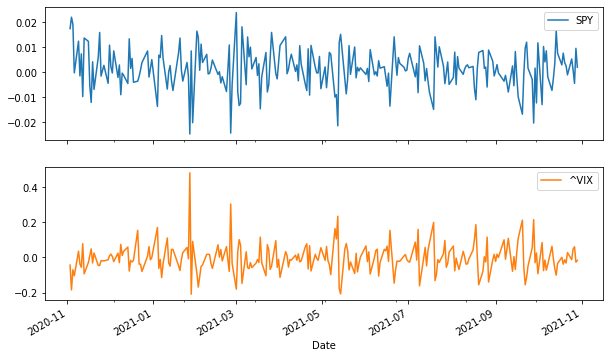

In [31]:
sprets.dropna(inplace=True)
sprets.plot(subplots=True, figsize=(10, 6))

In such a context, the pandas scatter_matrix() plotting function comes in handy for visualizations. It plots the log returns of the two series against each other, and one can add either a histogram or a kernel density estimator (KDE) on the diagonal:

array([[<AxesSubplot:xlabel='SPY', ylabel='SPY'>,
        <AxesSubplot:xlabel='^VIX', ylabel='SPY'>],
       [<AxesSubplot:xlabel='SPY', ylabel='^VIX'>,
        <AxesSubplot:xlabel='^VIX', ylabel='^VIX'>]], dtype=object)

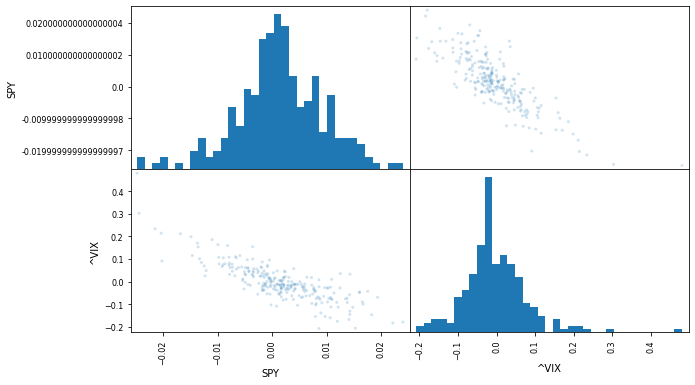

In [32]:
pd.plotting.scatter_matrix(sprets, alpha=0.2, diagonal='hist', hist_kwds={'bins': 35}, figsize=(10, 6))

#### OLS Regression

With all these preparations, an ordinary least-squares (OLS) regression analysis is convenient to implement.

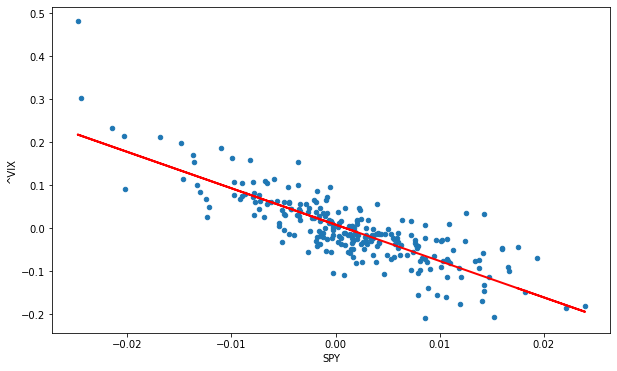

In [33]:
reg = np.polyfit(sprets['SPY'], sprets['^VIX'], deg=1)
ax = sprets.plot(kind='scatter', x='SPY', y='^VIX', figsize=(10, 6))
ax.plot(sprets['SPY'], np.polyval(reg, sprets['SPY']), 'r', lw=2);

#### Correlation

Finally, we consider correlation measures directly. Two such measures are considered: a static one taking into account the complete data set and a rolling one showing the correlation for a fixed window over time.

In [34]:
sprets.corr()

,SPY,^VIX
SPY,1.000000,-0.819994
^VIX,-0.819994,1.000000


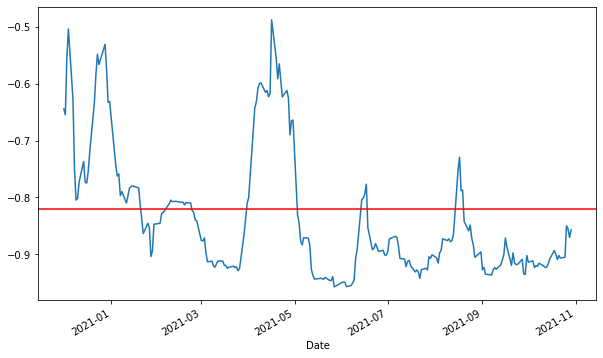

In [35]:
ax = sprets['SPY'].rolling(window=20).corr(sprets['^VIX']).plot(figsize=(10, 6)) 
ax.axhline(sprets.corr().iloc[0, 1], c='r');